## Analysing Adverse Food Events

CAERS is a database that contains information on adverse event and product complaint reports submitted to FDA for foods, dietary supplements, and cosmetics. Approximately 90k reactions are recorded from 2004-mid 2017, with 12 columns of information regarding type of reaction and related event details.

Inspiration :
-  What are the most commonly reported foodstuffs?
-  What are the most commonly reported medical reactions to foods?
-  Where do people in the US most commonly report food-related conditions?

In [92]:
#Setting the working directory
import os 

os.chdir("C:/Users/Mounika/Documents/monica work/KAGGLE/adverse-food-events")

In [93]:
#Reading the data
import pandas as pd

events_data = pd.read_csv("CAERS_ASCII_2004_2017Q2.csv")

### Understanding the data

In [94]:
#Dimensions of data

events_data.shape

(90786, 12)

In [95]:
#Top 5 records

events_data.head()

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [96]:
#Features of data

events_data.columns

Index(['RA_Report #', 'RA_CAERS Created Date', 'AEC_Event Start Date',
       'PRI_Product Role', 'PRI_Reported Brand/Product Name',
       'PRI_FDA Industry Code', 'PRI_FDA Industry Name',
       'CI_Age at Adverse Event', 'CI_Age Unit', 'CI_Gender',
       'AEC_One Row Outcomes', 'SYM_One Row Coded Symptoms'],
      dtype='object')

In [97]:
#Replacing spaces between column names with underscore

events_data.columns = [c.replace(' ', '_') for c in events_data.columns]

In [98]:
#Renaming column names for simplicity

events_data = events_data.rename(columns = {"RA_Report_#":"ReportID"})

events_data = events_data.rename(columns = {"PRI_Reported_Brand/Product_Name":"Brand"})

In [99]:
#Datatypes of columns

events_data.dtypes

ReportID                        int64
RA_CAERS_Created_Date          object
AEC_Event_Start_Date           object
PRI_Product_Role               object
Brand                          object
PRI_FDA_Industry_Code           int64
PRI_FDA_Industry_Name          object
CI_Age_at_Adverse_Event       float64
CI_Age_Unit                    object
CI_Gender                      object
AEC_One_Row_Outcomes           object
SYM_One_Row_Coded_Symptoms     object
dtype: object

### Data Pre Processing 

In [100]:
#Checking for duplicate records

events_data.loc[events_data.ReportID.duplicated(), : ]

,ReportID,RA_CAERS_Created_Date,AEC_Event_Start_Date,PRI_Product_Role,Brand,PRI_FDA_Industry_Code,PRI_FDA_Industry_Name,CI_Age_at_Adverse_Event,CI_Age_Unit,CI_Gender,AEC_One_Row_Outcomes,SYM_One_Row_Coded_Symptoms
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
8,65353,1/2/2004,12/1/2003,Suspect,HERBALIFE TOTAL CONTROL,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,Not Available,Female,VISITED A HEALTH CARE PROVIDER,"PARANOIA, PHYSICAL EXAMINATION, DELUSION"
23,65420,1/6/2004,11/1/2003,Suspect,DIET CAFFEINE FREE COKE,29,Soft Drink/Water,33.0,Year(s),Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS..."
24,65420,1/6/2004,11/1/2003,Suspect,DIET COKE,29,Soft Drink/Water,33.0,Year(s),Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS..."
25,65420,1/6/2004,11/1/2003,Suspect,DIET PEPSI,29,Soft Drink/Water,33.0,Year(s),Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS..."
26,65420,1/6/2004,11/1/2003,Suspect,DIET SPRITE,29,Soft Drink/Water,33.0,Year(s),Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS..."
27,65420,1/6/2004,11/1/2003,Suspect,JAMS,22,Fruit/Fruit Prod,33.0,Year(s),Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS..."
28,65420,1/6/2004,11/1/2003,Suspect,LISTERINE STRIPS,53,Cosmetics,33.0,Year(s),Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS..."
29,65420,1/6/2004,11/1/2003,Suspect,NUTRASWEET,45,Food Additives (Human Use),33.0,Year(s),Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS..."
30,65420,1/6/2004,11/1/2003,Suspect,PUDDINGS,35,Gelatin/Rennet/Pudding Mix/Pie Filling,33.0,Year(s),Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS..."


We observe that the reports with same ID sometimes have different entries for product industry name,symptoms and outcomes.So, we now try to find duplicates that matches all the features except for the product brand(different products belonging to the same industry name are also considered as duplicates).

In [101]:
events_data.loc[events_data.duplicated(subset=['ReportID','RA_CAERS_Created_Date','AEC_Event_Start_Date','PRI_Product_Role',
                                              'PRI_FDA_Industry_Code','PRI_FDA_Industry_Name','CI_Age_at_Adverse_Event','CI_Age_Unit',
                                              'CI_Gender','AEC_One_Row_Outcomes','SYM_One_Row_Coded_Symptoms']), : ]

,ReportID,RA_CAERS_Created_Date,AEC_Event_Start_Date,PRI_Product_Role,Brand,PRI_FDA_Industry_Code,PRI_FDA_Industry_Name,CI_Age_at_Adverse_Event,CI_Age_Unit,CI_Gender,AEC_One_Row_Outcomes,SYM_One_Row_Coded_Symptoms
8,65353,1/2/2004,12/1/2003,Suspect,HERBALIFE TOTAL CONTROL,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,Not Available,Female,VISITED A HEALTH CARE PROVIDER,"PARANOIA, PHYSICAL EXAMINATION, DELUSION"
24,65420,1/6/2004,11/1/2003,Suspect,DIET COKE,29,Soft Drink/Water,33.0,Year(s),Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS..."
25,65420,1/6/2004,11/1/2003,Suspect,DIET PEPSI,29,Soft Drink/Water,33.0,Year(s),Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS..."
26,65420,1/6/2004,11/1/2003,Suspect,DIET SPRITE,29,Soft Drink/Water,33.0,Year(s),Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS..."
31,65420,1/6/2004,11/1/2003,Suspect,TEA,31,Coffee/Tea,33.0,Year(s),Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS..."
33,65421,1/6/2004,8/21/2003,Suspect,GATORADE SPORTS DRINK,29,Soft Drink/Water,14.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,ALOPECIA
41,65427,1/6/2004,NaN,Suspect,PRODUCTS CONTAINING EPHEDRA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),27.0,Year(s),Female,VISITED A HEALTH CARE PROVIDER,PERIPHERAL VASCULAR DISORDER
51,65438,1/6/2004,11/1/2003,Suspect,DIET COKE,29,Soft Drink/Water,NaN,Not Available,Female,"LIFE THREATENING, DISABILITY","BALANCE DISORDER, ORTHOSTATIC HYPOTENSION, BLO..."
109,65619,1/12/2004,12/22/2003,Suspect,ALPHA LIPOIC,54,Vit/Min/Prot/Unconv Diet(Human/Animal),70.0,Year(s),Male,DISABILITY,"PHYSICAL EXAMINATION, IMPAIRED DRIVING ABILITY..."
110,65619,1/12/2004,12/22/2003,Suspect,CALCIUM CALTRATE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),70.0,Year(s),Male,DISABILITY,"PHYSICAL EXAMINATION, IMPAIRED DRIVING ABILITY..."


In [102]:
#Dropping the duplicates

events_data = events_data.drop_duplicates(subset=['ReportID','RA_CAERS_Created_Date','AEC_Event_Start_Date','PRI_Product_Role',
                                              'PRI_FDA_Industry_Code','PRI_FDA_Industry_Name','CI_Age_at_Adverse_Event','CI_Age_Unit',
                                              'CI_Gender','AEC_One_Row_Outcomes','SYM_One_Row_Coded_Symptoms'])

In [103]:
#Checking for missing values

pd.isna(events_data).sum()

ReportID                          0
RA_CAERS_Created_Date             0
AEC_Event_Start_Date          30402
PRI_Product_Role                  0
Brand                             0
PRI_FDA_Industry_Code             0
PRI_FDA_Industry_Name             0
CI_Age_at_Adverse_Event       34339
CI_Age_Unit                       0
CI_Gender                         0
AEC_One_Row_Outcomes              0
SYM_One_Row_Coded_Symptoms        5
dtype: int64

Since almost 42% of AEC_Event_Start_Date are missing, I decided to drop that column along with RA_CAERS_Created_Date as it doesn't yield any valuable information.

In [104]:
#Dropping created date and event start date

events_data = events_data.drop(['RA_CAERS_Created_Date','AEC_Event_Start_Date'],axis=1)

In [105]:
#Converting PRI_Product_Role to category type

events_data['PRI_Product_Role'] = events_data['PRI_Product_Role'].astype('category')

In [106]:
events_data.head()

,ReportID,PRI_Product_Role,Brand,PRI_FDA_Industry_Code,PRI_FDA_Industry_Name,CI_Age_at_Adverse_Event,CI_Age_Unit,CI_Gender,AEC_One_Row_Outcomes,SYM_One_Row_Coded_Symptoms
0,65325,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [107]:
#Finding the unique brands 

#Removing all the non - alphabetic characters

import re

pattern = '[^ a-zA-Z]'
events_data["Brand"] = events_data.apply(lambda row: ' '.join(re.sub(pattern,"",row["Brand"]).split()), axis=1)

#Finding Unique Brands Using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

brand_vec=CountVectorizer(token_pattern="[\w]+[\w\d\s\(\)\'\%\+.-]+",max_features=12000)
y = brand_vec.fit_transform(events_data.Brand)

#Feature names(Unique Brands)

(brand_vec.get_feature_names())


['a and w diet root beer',
 'a legend in a nutshell virginia diner allnatural gourmet virginia peanuts',
 'a steak sauce',
 'a thousand virgins g grey wash tattoo ink',
 'a world tea peppermint tea awakening',
 'aaa international seafood corporation frozen yellowfin tuna steak',
 'abee med capsules',
 'abita springs water spring water',
 'abs omega q plus',
 'absolutely divine intense dark chocolate',
 'absopure natural spring water',
 'absorbmax',
 'acadia bottled water',
 'acadia natural spring water',
 'acai',
 'acai pure',
 'acaiburn',
 'accelerator',
 'accera axona',
 'accera inc axona',
 'ace extreme diet aid',
 'acetyl l carnitine',
 'acetyl lcarnitine',
 'acetyllcarnitine',
 'aceytllcarnitine',
 'acidophilus',
 'acidophilus lactobacillus acidophilus',
 'acme signature kitchens buttermilk waffles',
 'acme spinach',
 'acrezzio flat fillet of anchovies',
 'act ii kettle corn',
 'activated charcoal',
 'active fiber complex apple flavor',
 'active nutrients',
 'activemind coated cap

In [108]:
#Number of unique brands

len(brand_vec.get_feature_names())

12000

That's a lot of brands!

In [109]:
#Finding unique industry codes

len(pd.unique(events_data.PRI_FDA_Industry_Code))

44

In [110]:
#Converting PRI_FDA_Industry_Code to category type

events_data['PRI_FDA_Industry_Code'] = events_data['PRI_FDA_Industry_Code'].astype('category')

In [111]:
pd.unique(events_data.CI_Age_Unit)

array(['Year(s)', 'Not Available', 'Month(s)', 'Week(s)', 'Day(s)',
       'Decade(s)'], dtype=object)

In [112]:
#Feature Engineering
#Normalising Age by combining Age and its unit
import numpy as np 

def normalise_row(row):
    if row['CI_Age_Unit'] == 'Year(s)':
        return row['CI_Age_at_Adverse_Event'] * 365
    elif row['CI_Age_Unit'] == 'Not Available':
        return np.nan
    elif row['CI_Age_Unit'] == 'Month(s)':
        return row['CI_Age_at_Adverse_Event'] * 30.5
    elif row['CI_Age_Unit'] == 'Week(s)':
        return row['CI_Age_at_Adverse_Event'] * 7
    elif row['CI_Age_Unit'] == 'Decade(s)':
        return row['CI_Age_at_Adverse_Event'] * 10 * 365
    

events_data['Age'] = events_data.apply(lambda row : normalise_row(row), axis=1) 
events_data.head()

,ReportID,PRI_Product_Role,Brand,PRI_FDA_Industry_Code,PRI_FDA_Industry_Name,CI_Age_at_Adverse_Event,CI_Age_Unit,CI_Gender,AEC_One_Row_Outcomes,SYM_One_Row_Coded_Symptoms,Age
0,65325,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...",730.0
1,65325,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL...",730.0
2,65333,Suspect,KROGER CLASSIC CREAMDEMINT CANDY MINT CHIP ICE...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA",NaN
3,65335,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING",91.5
4,65336,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION",NaN


In [113]:
#Dropping CI_Age_at_Adverse_Events and CI_Age_Unit columns

events_data = events_data.drop(['CI_Age_at_Adverse_Event','CI_Age_Unit'],axis=1)

In [114]:
#Checking the uniques values in CI_Gender

pd.unique(events_data.CI_Gender)

array(['Female', 'Not Available', 'Male', 'Unknown', 'Not Reported'],
      dtype=object)

In [119]:
#Replacing certain patterns with null values

events_data['CI_Gender'] = events_data['CI_Gender'].replace(to_replace=['Not Available','Unknown','Not Reported'],value=np.nan)       

In [123]:
#Converting CI_Gender to category type

events_data['CI_Gender'] = events_data['CI_Gender'].astype('category')

In [121]:
#Checking for missing values

pd.isna(events_data).sum()

ReportID                          0
PRI_Product_Role                  0
Brand                             0
PRI_FDA_Industry_Code             0
PRI_FDA_Industry_Name             0
CI_Gender                      4424
AEC_One_Row_Outcomes              0
SYM_One_Row_Coded_Symptoms        5
Age                           34480
dtype: int64

C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


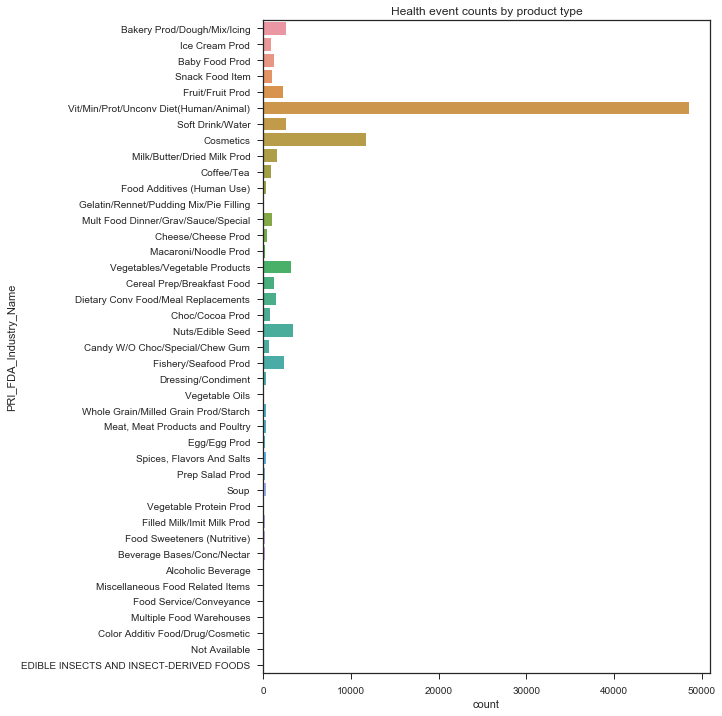

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,12))
sns.set_style("ticks")
sns.countplot(y=events_data['PRI_FDA_Industry_Name']).set_title('Health event counts by product type')

We observe that Vit/Min/Prot/Unconv Diet(Human/Animal) is causing most of the adverse health events.

In [13]:
len(pd.unique(events_data.AEC_One_Row_Outcomes))

298

In [14]:
pd.unique(events_data.AEC_One_Row_Outcomes)

array(['VISITED AN ER, VISITED A HEALTH CARE PROVIDER, REQ. INTERVENTION TO PRVNT PERM. IMPRMNT., HOSPITALIZATION',
       'VISITED AN ER', 'NON-SERIOUS INJURIES/ ILLNESS',
       'VISITED A HEALTH CARE PROVIDER', 'DEATH',
       'REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.',
       'LIFE THREATENING, HOSPITALIZATION',
       'LIFE THREATENING, DISABILITY',
       'VISITED A HEALTH CARE PROVIDER, REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.',
       'DISABILITY, LIFE THREATENING, HOSPITALIZATION',
       'DEATH, VISITED A HEALTH CARE PROVIDER, LIFE THREATENING, HOSPITALIZATION',
       'NON-SERIOUS INJURIES/ ILLNESS, VISITED AN ER',
       'VISITED A HEALTH CARE PROVIDER, NON-SERIOUS INJURIES/ ILLNESS',
       'VISITED AN ER, VISITED A HEALTH CARE PROVIDER, LIFE THREATENING',
       'VISITED AN ER, REQ. INTERVENTION TO PRVNT PERM. IMPRMNT., NON-SERIOUS INJURIES/ ILLNESS',
       'VISITED AN ER, VISITED A HEALTH CARE PROVIDER, HOSPITALIZATION',
       'VISITED AN ER, NON-SERIOUS INJURIES/ IL

In [111]:
#fig, ax = plt.subplots(figsize=(8,14))

product_count=events_data.groupby('Brand').size()
len(product_count[product_count>150])

24

In [160]:
product_count
.index=='REDACTED'

array([False, False, False, ..., False, False, False])

In [157]:
events_data.Brand

0            MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS
1            MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS
2        KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...
3                               ENFAMIL LIPIL BABY FORMULA
4                               ENFIMIL LIPIL BABY FORMULA
5              FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS
6                                                    GRAPE
7                                      HERBALIFE RELAX NOW
8                                  HERBALIFE TOTAL CONTROL
9                                                  YOHIMBE
10              CAL-C PEACH TROPIC ENRICHED BEVERAGE BLEND
11              CAL-C PEACH TROPIC ENRICHED BEVERAGE BLEND
12              CAL-C PEACH TROPIC ENRICHED BEVERAGE BLEND
13                      I CONTACT LIP-INK (SEMI-PERMANENT)
14                                 H.P. HOOD HALF AND HALF
15        LACTAID REDUCED FAT (2%) MILK; 100% LACTOSE FREE
16                                          METOBOLITE 3

In [141]:
pd.unique(product_count)

array([   2,    4,    1,    8,    3,   11,   56,   10,   45,   14,    5,
         25,    6,   15,    7,    9,   37,   12,  183,  111,   19,   27,
         22,   23,   49,   41,   55,   21,   33,   35,   16,   18,   24,
         38,   17,  118,  119,   13,  224,   30,  592,   28,   29,   72,
         51,   26,   57,  170,   53,  222,  107,   32,   96,   60,   44,
        157,   43,  121,  615,  132,   80,   36,   79,   84,  108,  124,
         20,   63,  622,   34,  158,   88,   31,   65,   42,  113,   82,
         39,  171,   40,  327,  148,  303,   64,   94,   78,  667,  115,
         66,   59,   77,   85,   73,  332,   67,  133,   54,  149,  150,
         61,   62,   52,  305, 6081,  648,   97,   50,  103,  223,  479,
        717,   76,  290,  242,  169,  142,  372,   58], dtype=int64)

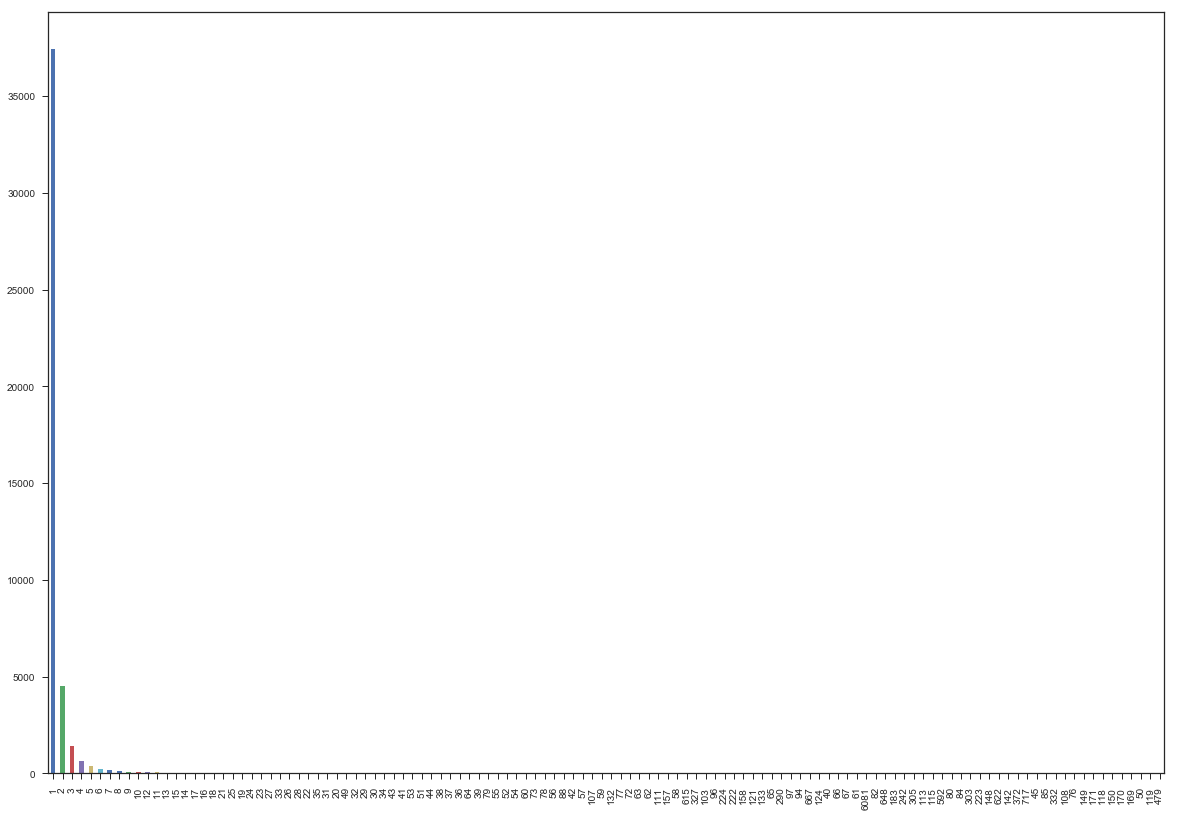

In [146]:
fig, ax = plt.subplots(figsize=(20,14))

product_count.value_counts().plot('bar')

In [114]:
(product_count).describe()

count    45685.000000
mean         1.987217
std         30.120480
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       6081.000000
dtype: float64

In [103]:

outcomes_vec=CountVectorizer(token_pattern="[\w]+[\w\s\(\)./-]+")
x = outcomes_vec.fit_transform(events_data.AEC_One_Row_Outcomes)


In [20]:
print (outcomes_vec.get_feature_names())

['congenital anomaly', 'death', 'disability', 'hospitalization', 'life threatening', 'non-serious injuries/ illness', 'none', 'other serious (important medical events)', 'req. intervention to prvnt perm. imprmnt.', 'serious injuries/ illness', 'visited a health care provider', 'visited an er']


In [21]:
outcomes_vec_df = pd.DataFrame(x.todense(), columns=outcomes_vec.get_feature_names())

In [22]:
outcomes_vec_df.head()

,congenital anomaly,death,disability,hospitalization,life threatening,non-serious injuries/ illness,none,other serious (important medical events),req. intervention to prvnt perm. imprmnt.,serious injuries/ illness,visited a health care provider,visited an er
0,0,0,0,1,0,0,0,0,1,0,1,1
1,0,0,0,1,0,0,0,0,1,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
records = pd.crosstab(index=outcomes_vec_df["none"],  # Make a crosstab
                              columns="count")
print(records)

col_0  count
none        
0      90641
1        145


In [24]:
import re

stre = "flintstones complete ts + vit k  (multivitamins + minerals)"
str = re.sub('[^ a-zA-Z0-9]', '', stre)
print(str)

flintstones complete ts  vit k  multivitamins  minerals


In [206]:
industry_vec=CountVectorizer(token_pattern="[\w]+[\w\s\(\)./-]+")
z = industry_vec.fit_transform(events_data.PRI_FDA_Industry_Name)

In [220]:
len(industry_vec.get_feature_names())

43

In [208]:
industry_vec_df = pd.DataFrame(z.todense(), columns=industry_vec.get_feature_names())

In [209]:
industry_vec_df.head()

,alcoholic beverage,baby food prod,bakery prod/dough/mix/icing,beverage bases/conc/nectar,candy w/o choc/special/chew gum,cereal prep/breakfast food,cheese/cheese prod,choc/cocoa prod,coffee/tea,color additiv food/drug/cosmetic,...,prep salad prod,snack food item,soft drink/water,soup,spices,vegetable oils,vegetable protein prod,vegetables/vegetable products,vit/min/prot/unconv diet(human/animal),whole grain/milled grain prod/starch
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
records = pd.crosstab(index=industry_vec_df["baby food prod"],  # Make a crosstab
                              columns="count")
print(records)

col_0           count
baby food prod       
0               89522
1                1264


In [212]:
df = events_data.fillna(events_data['SYM_One_Row_Coded_Symptoms'].value_counts().index[0])

In [217]:
symptoms_vec=CountVectorizer(token_pattern="[\w]+[\w\s\(\)./-]+")
sym = symptoms_vec.fit_transform(df.SYM_One_Row_Coded_Symptoms)

In [221]:
sym.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [218]:
print(symptoms_vec.get_feature_names())

['abasia', 'abdominal abscess', 'abdominal adhesions', 'abdominal compartment syndrome', 'abdominal discomfort', 'abdominal distension', 'abdominal hernia', 'abdominal hernia obstructive', 'abdominal hernia perforation', 'abdominal infection', 'abdominal injury', 'abdominal mass', 'abdominal neoplasm', 'abdominal pain', 'abdominal pain lower', 'abdominal pain upper', 'abdominal rigidity', 'abdominal sepsis', 'abdominal strangulated hernia', 'abdominal symptom', 'abdominal tenderness', 'abdominal wall abscess', 'abdominal wall disorder', 'abnormal behaviour', 'abnormal clotting factor', 'abnormal dreams', 'abnormal faeces', 'abnormal loss of weight', 'abnormal sensation in eye', 'abnormal sleep-related event', 'abnormal weight gain', 'aborted pregnancy', 'abortion', 'abortion spontaneous', 'abortion threatened', 'abscess', 'abscess bacterial', 'abscess drainage', 'abscess fungal', 'abscess intestinal', 'acarodermatitis', 'accident', 'accidental device ingestion', 'accidental drug intake

In [219]:
len(symptoms_vec.get_feature_names())

4164

In [271]:
symptoms_vec_df = pd.DataFrame(sym.todense(), columns=symptoms_vec.get_feature_names())

In [272]:
symptoms_vec_df.head()

,abasia,abdominal abscess,abdominal adhesions,abdominal compartment syndrome,abdominal discomfort,abdominal distension,abdominal hernia,abdominal hernia obstructive,abdominal hernia perforation,abdominal infection,...,x-ray,x-ray abnormal,x-ray gastrointestinal tract abnormal,x-ray limb abnormal,x-ray with contrast upper gastrointestinal tract,xanthopsia,yawning,yellow skin,yersinia infection,zoonosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [277]:
events_data = pd.concat([events_data,outcomes_vec_df ], axis=1)

In [278]:
events_data.shape

(90786, 48)

In [280]:
events_data = pd.concat([events_data,industry_vec_df], axis=1)

In [281]:
events_data.shape

(90786, 91)

In [282]:
events_data = pd.concat([events_data,symptoms_vec_df], axis=1)

In [283]:
events_data.shape

(90786, 4255)

In [284]:
events_data['SYM_One_Row_Coded_Symptoms']

0        SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...
1        SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL...
2                             NAUSEA, DYSGEUSIA, DIARRHOEA
3                      GASTROINTESTINAL DISORDER, VOMITING
4          GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION
5                                                  CHOKING
6                                           DEATH, CHOKING
7                 PARANOIA, PHYSICAL EXAMINATION, DELUSION
8                 PARANOIA, PHYSICAL EXAMINATION, DELUSION
9                                 BLOOD PRESSURE INCREASED
10       RASH, FLUSHING, MALAISE, FAECES PALE, VOMITING...
11       LOOSE STOOLS, ABDOMINAL PAIN UPPER, VOMITING, ...
12       RASH, LOOSE STOOLS, ABDOMINAL PAIN UPPER, MALA...
13                        SWELLING FACE, PARAESTHESIA ORAL
14                                             PHARYNGITIS
15                                                VOMITING
16               COMPLETED SUICIDE, STRESS SYMPTOMS, DEA

In [125]:
events_data.head(10)

,ReportID,PRI_Product_Role,Brand,PRI_FDA_Industry_Code,PRI_FDA_Industry_Name,CI_Gender,AEC_One_Row_Outcomes,SYM_One_Row_Coded_Symptoms,Age
0,65325,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...",730.0
1,65325,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL...",730.0
2,65333,Suspect,KROGER CLASSIC CREAMDEMINT CANDY MINT CHIP ICE...,13,Ice Cream Prod,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA",NaN
3,65335,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING",91.5
4,65336,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION",NaN
5,65345,Suspect,FRITO LAY FUNYUNS ONION FLAVOR ONION RINGS,7,Snack Food Item,Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING,3650.0
6,65350,Suspect,GRAPE,20,Fruit/Fruit Prod,NaN,DEATH,"DEATH, CHOKING",NaN
7,65353,Suspect,HERBALIFE RELAX NOW,54,Vit/Min/Prot/Unconv Diet(Human/Animal),Female,VISITED A HEALTH CARE PROVIDER,"PARANOIA, PHYSICAL EXAMINATION, DELUSION",NaN
9,65354,Suspect,YOHIMBE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),Male,REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.,BLOOD PRESSURE INCREASED,24090.0
10,65355,Suspect,CALC PEACH TROPIC ENRICHED BEVERAGE BLEND,29,Soft Drink/Water,Male,NON-SERIOUS INJURIES/ ILLNESS,"RASH, FLUSHING, MALAISE, FAECES PALE, VOMITING...",NaN


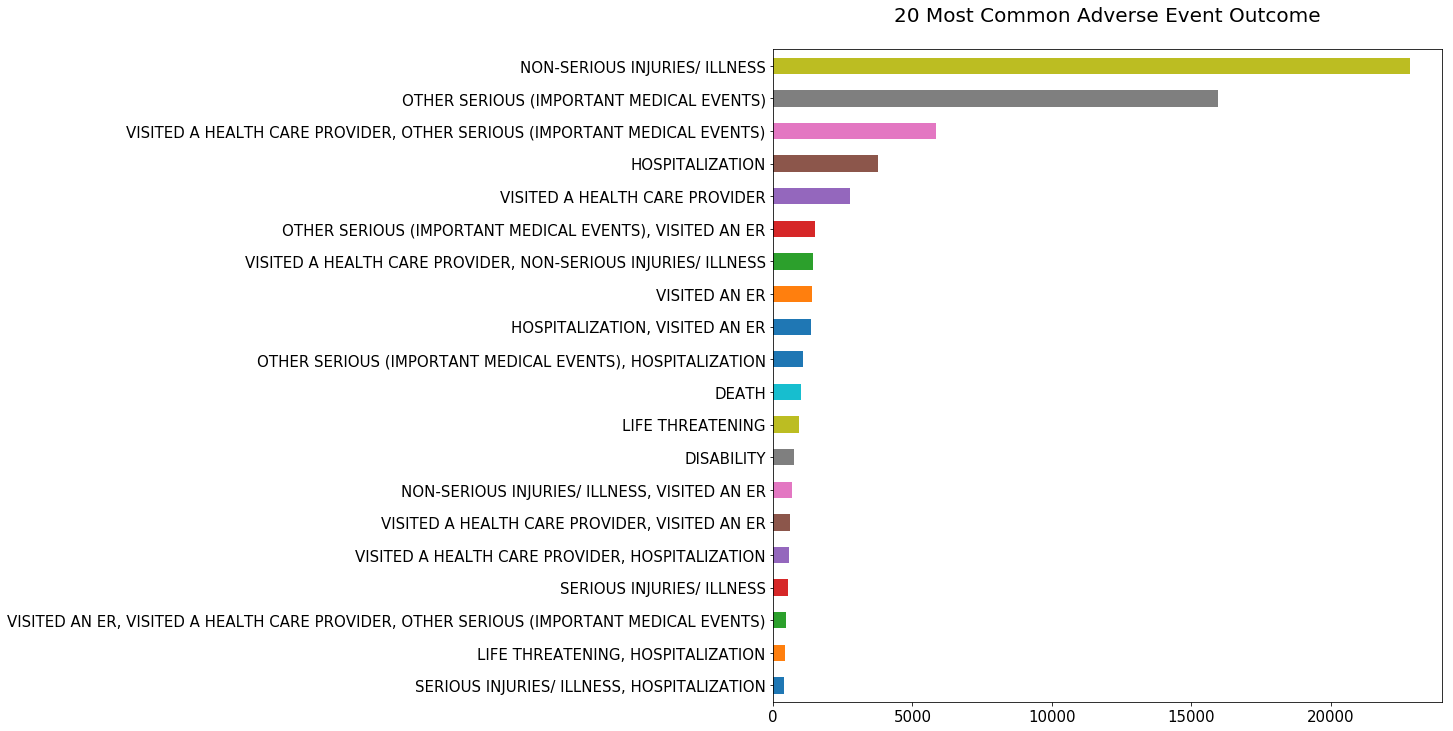


Number of different Outcomes:  298


In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
events_data['AEC_One_Row_Outcomes'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('20 Most Common Adverse Event Outcome\n',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print('\nNumber of different Outcomes: ',len(events_data['AEC_One_Row_Outcomes'].value_counts()))